In [3]:
import sys
sys.path.append('../../../src')
from helpers import *
%matplotlib widget

In [4]:
n = 10
cytbg = np.loadtxt('cytbg.txt')

In [5]:
# Import dataframe
df = pd.read_csv('../PAR-2 NEBD quantification/NEBD_Embryos_dataframe.csv')

# Select 10 random wild type, C56S and L109R embryos
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('df_sample.csv')

In [6]:
df = pd.read_csv('df_sample.csv')
df

,Unnamed: 0,Unnamed: 0.1,Path,EmbryoID,Line,Date,RNAi
0,5,5,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1580292634,lp637,200129,wt
1,2,2,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1580292449,lp637,200129,wt
2,210,210,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1636725467,lp637,211112,wt
3,399,399,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1659696123,lp637,220805,wt
4,404,404,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1659702579,lp637,220805,wt
5,3,3,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1580292501,lp637,200129,wt
6,0,0,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1580292350,lp637,200129,wt
7,4,4,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1580292520,lp637,200129,wt
8,398,398,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1659695815,lp637,220805,wt
9,425,425,/Users/blandt/Desktop/Paper data//Imaging/PAR-...,1661259794,lp637,220823,wt


In [7]:
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

10


In [8]:
imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

In [9]:
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### WT calibration

100%|██████████| 1000/1000 [00:07<00:00, 134.66it/s]


<IPython.core.display.Javascript object>


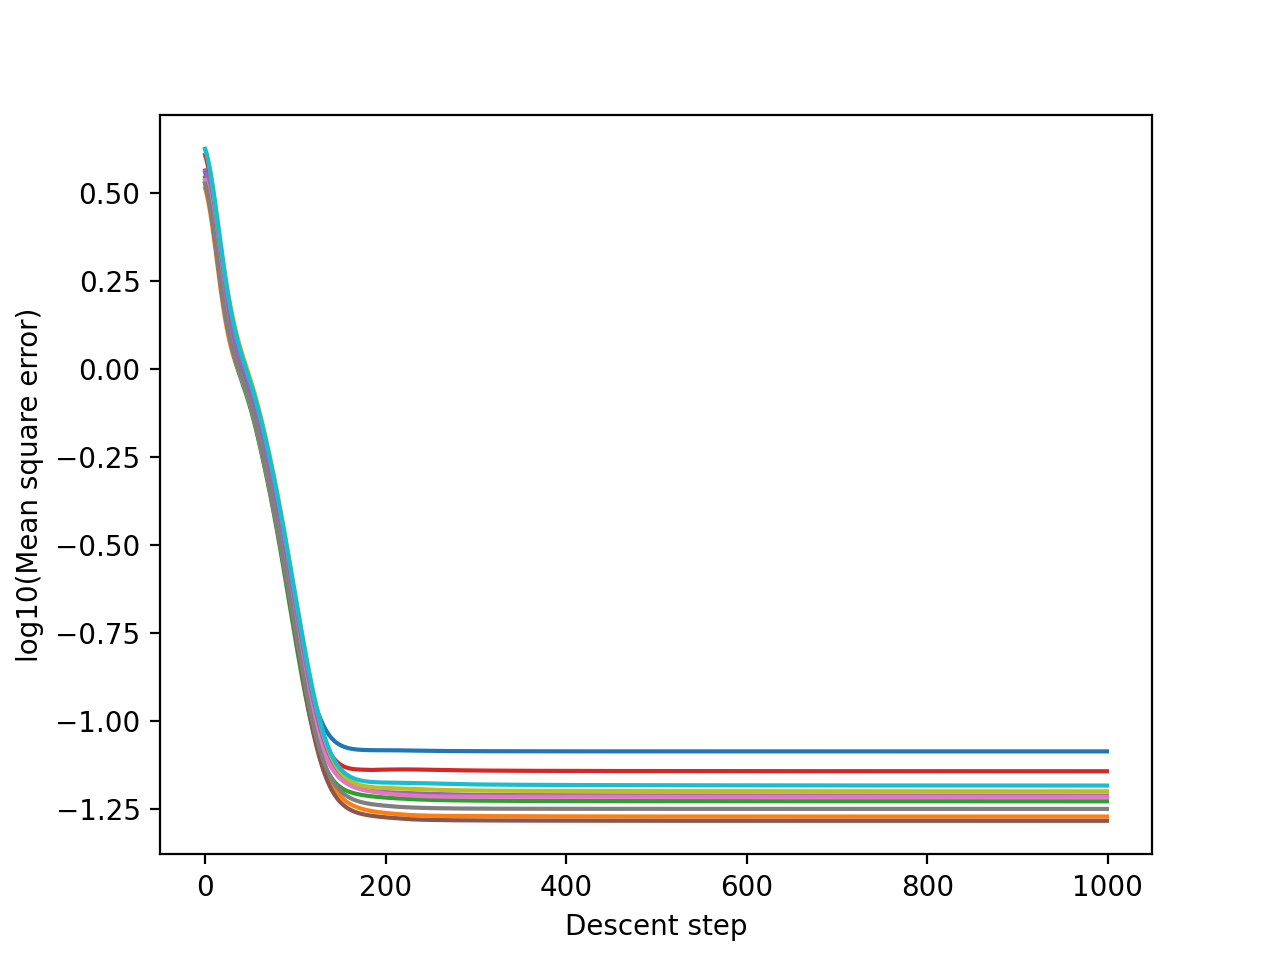

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [10]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### C56S calibration

100%|██████████| 1000/1000 [00:07<00:00, 133.71it/s]


<IPython.core.display.Javascript object>


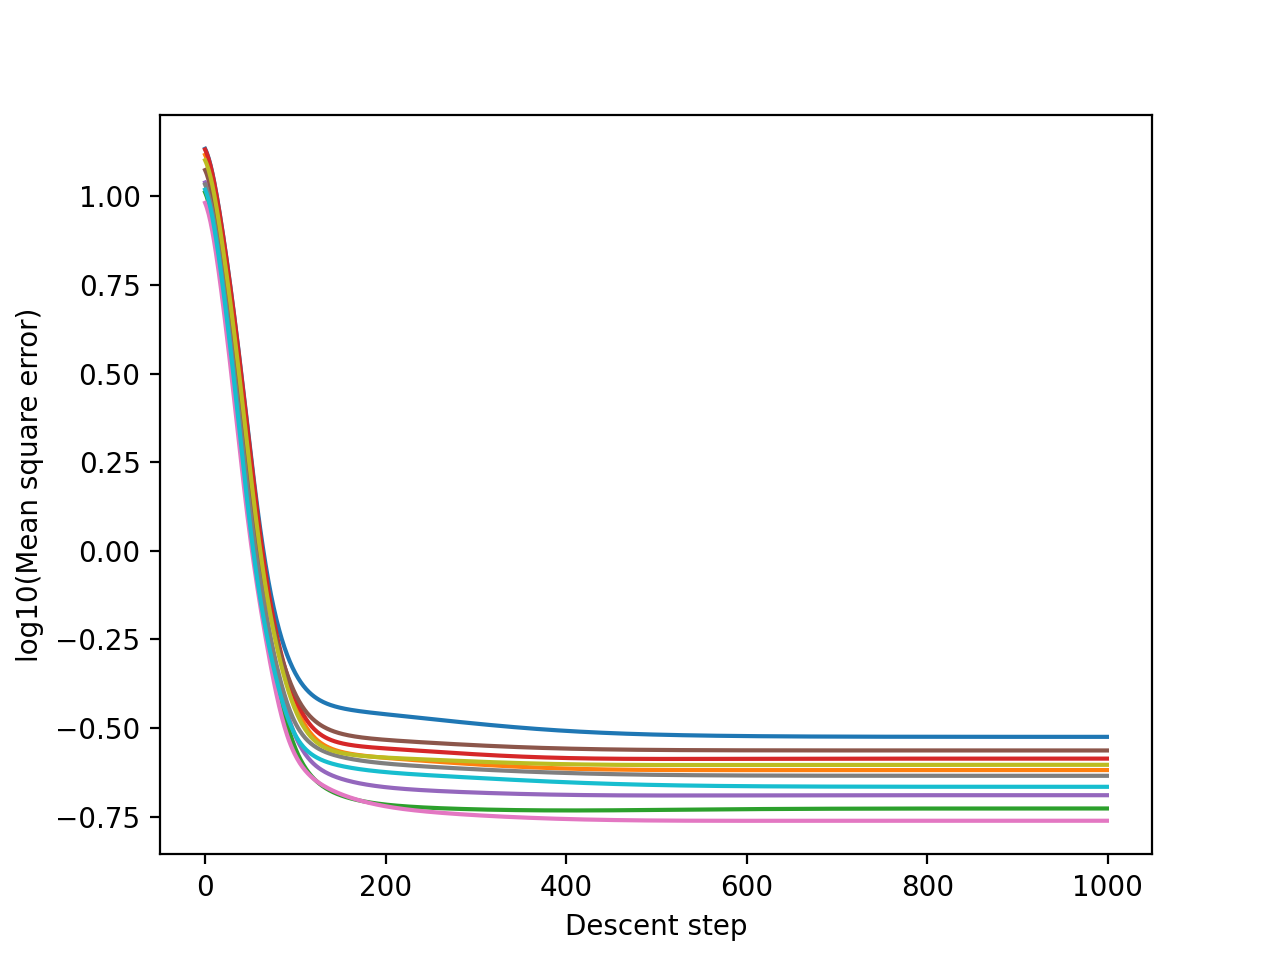

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [11]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### L109R calibration

100%|██████████| 1000/1000 [00:07<00:00, 134.98it/s]


<IPython.core.display.Javascript object>


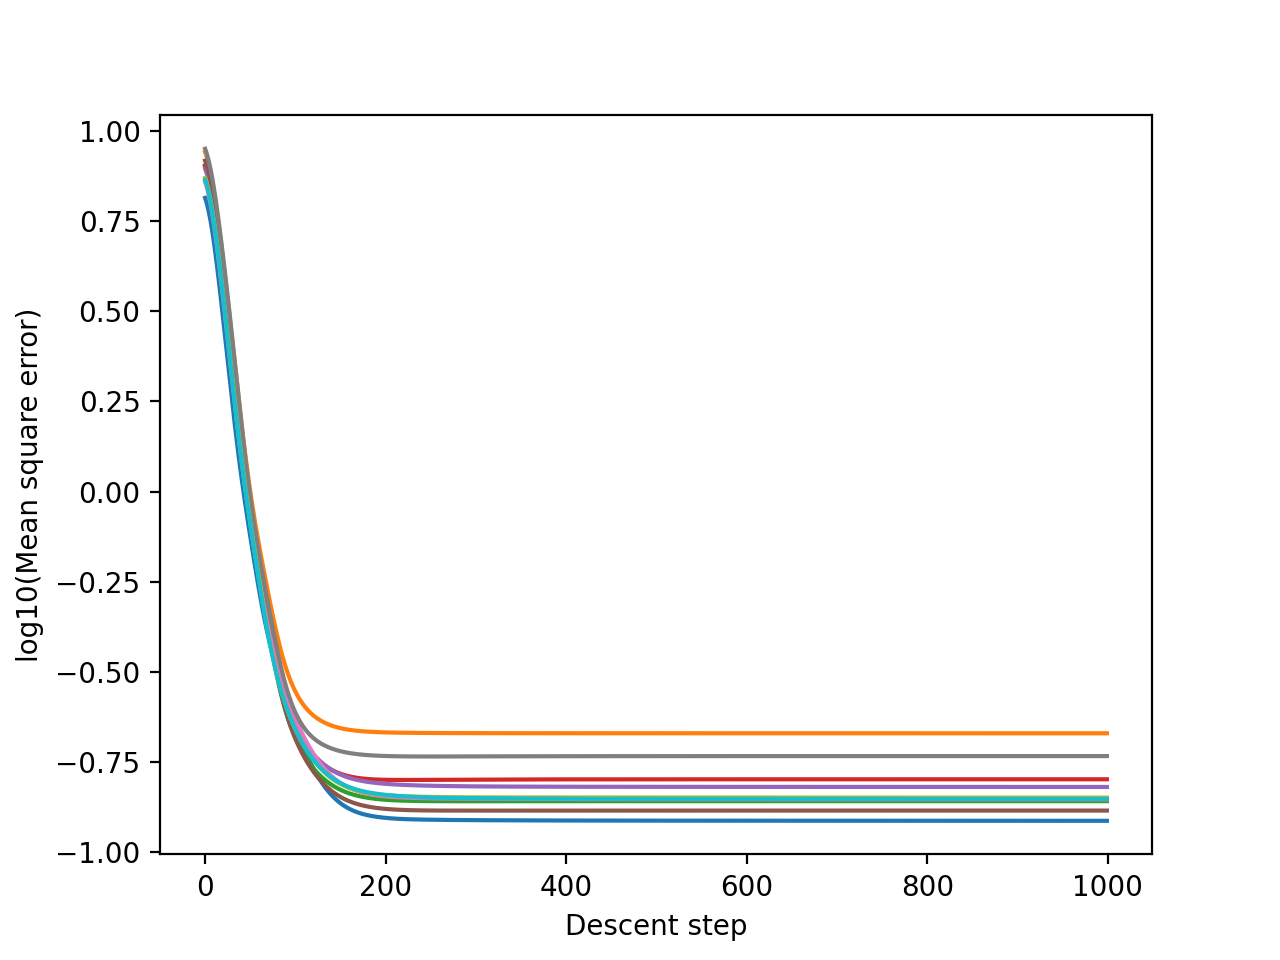

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [12]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### L50R calibration

100%|██████████| 1000/1000 [00:07<00:00, 138.88it/s]


<IPython.core.display.Javascript object>


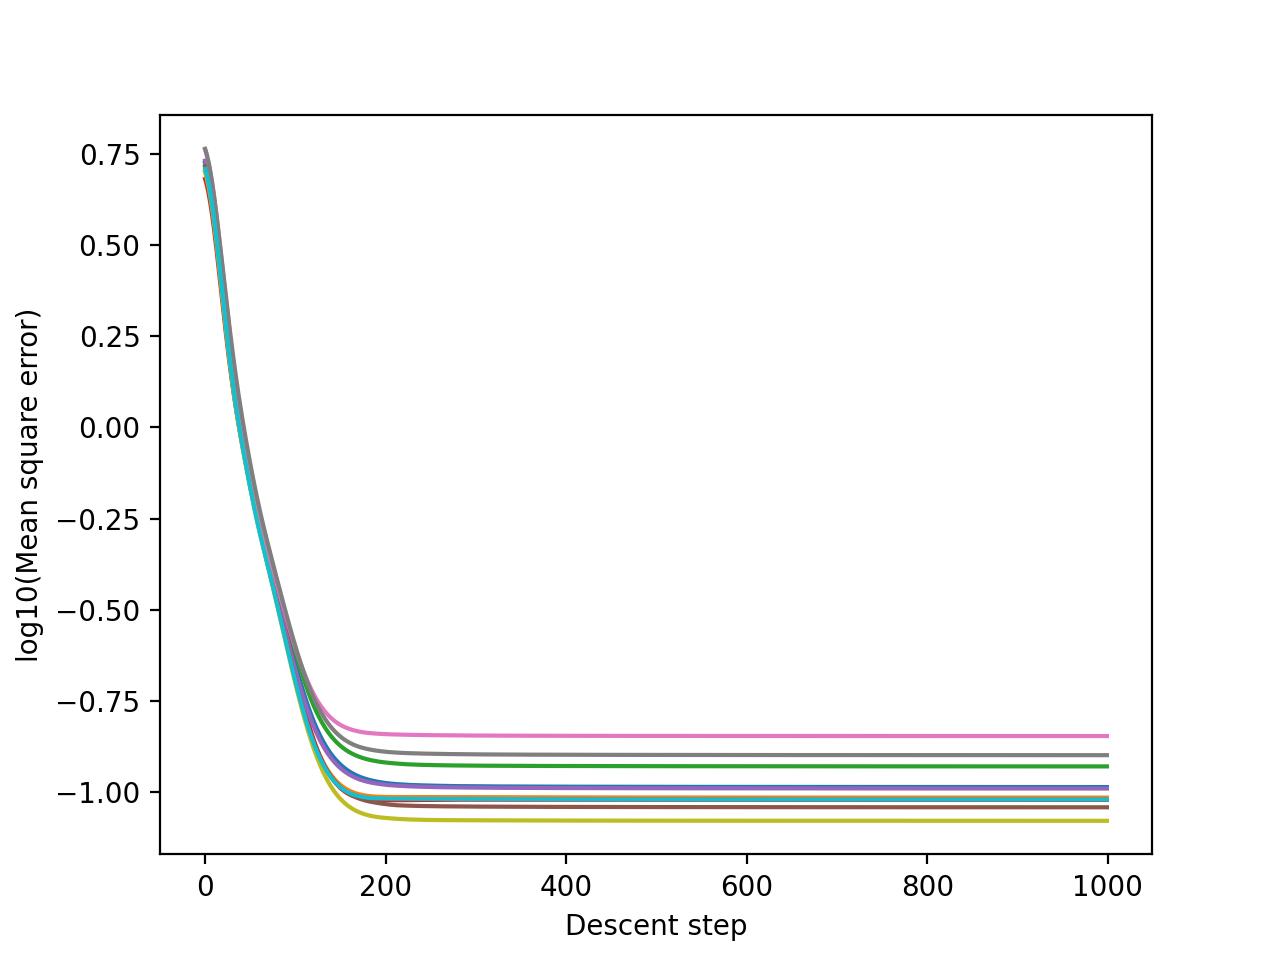

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [13]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Het calibration

100%|██████████| 1000/1000 [00:06<00:00, 146.46it/s]


<IPython.core.display.Javascript object>


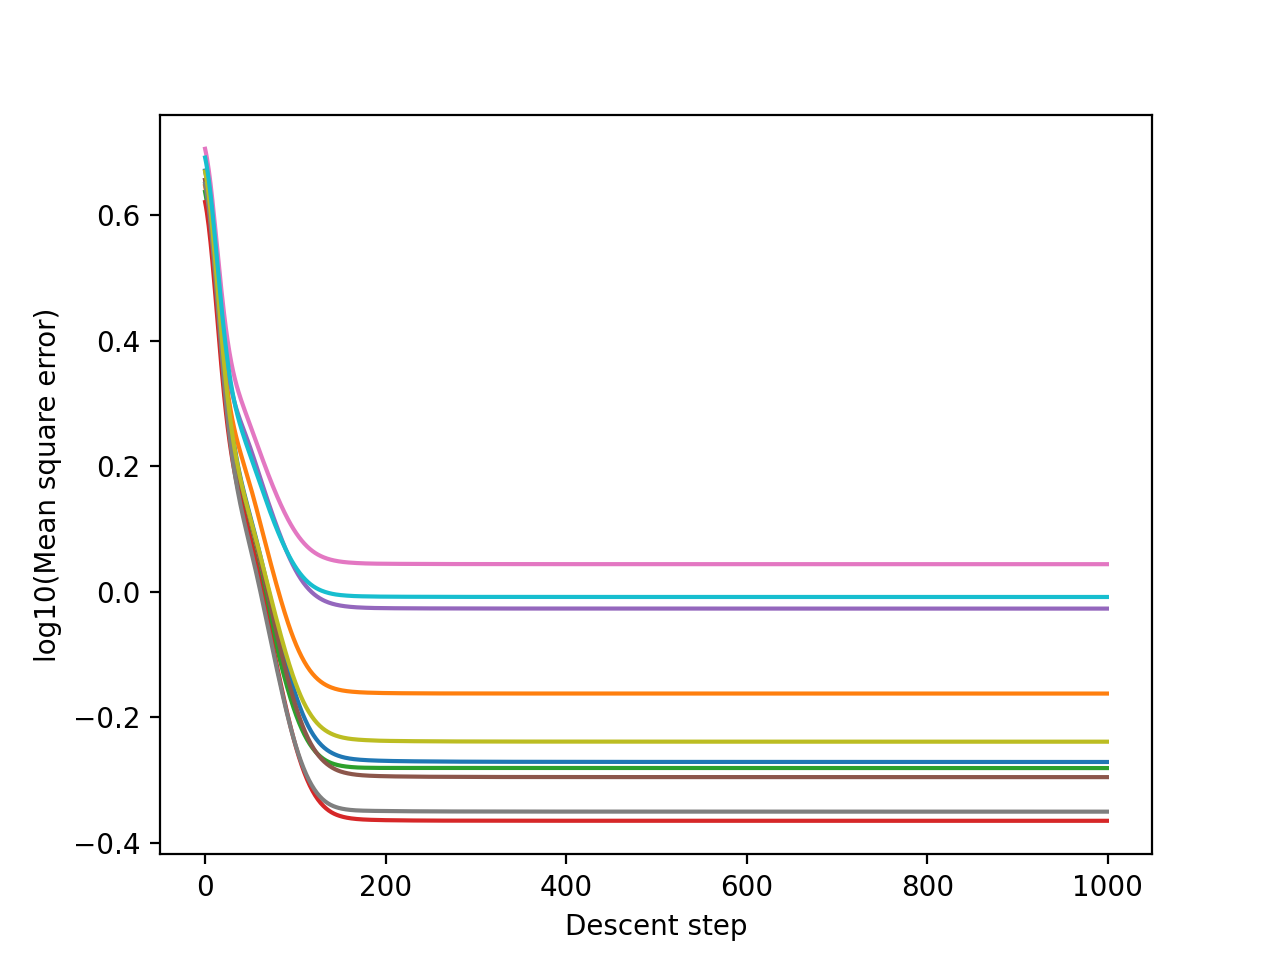

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [14]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Full dataset calibration

100%|██████████| 1000/1000 [00:19<00:00, 52.16it/s]


<IPython.core.display.Javascript object>


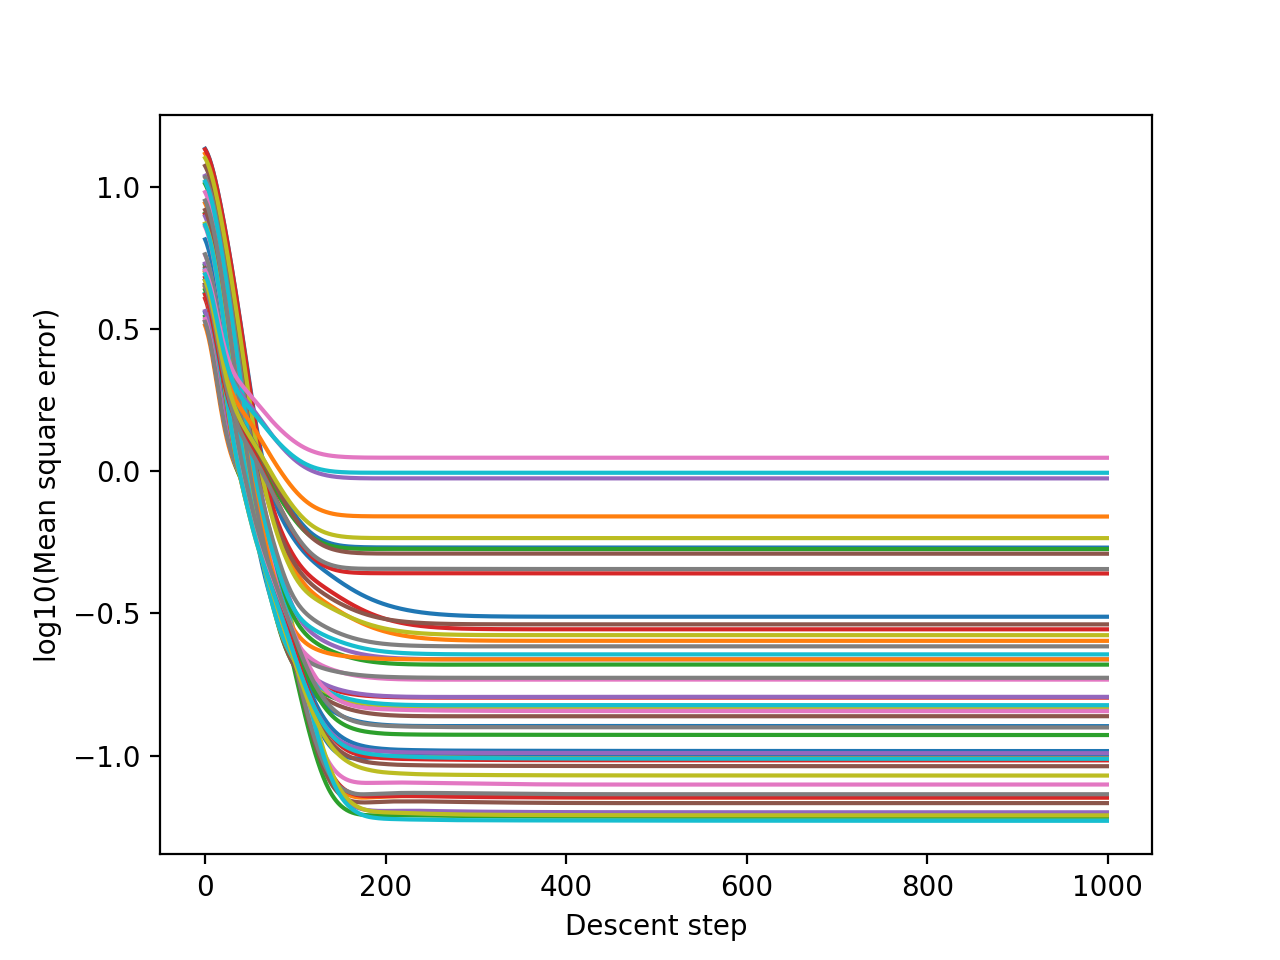

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [15]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

<IPython.core.display.Javascript object>


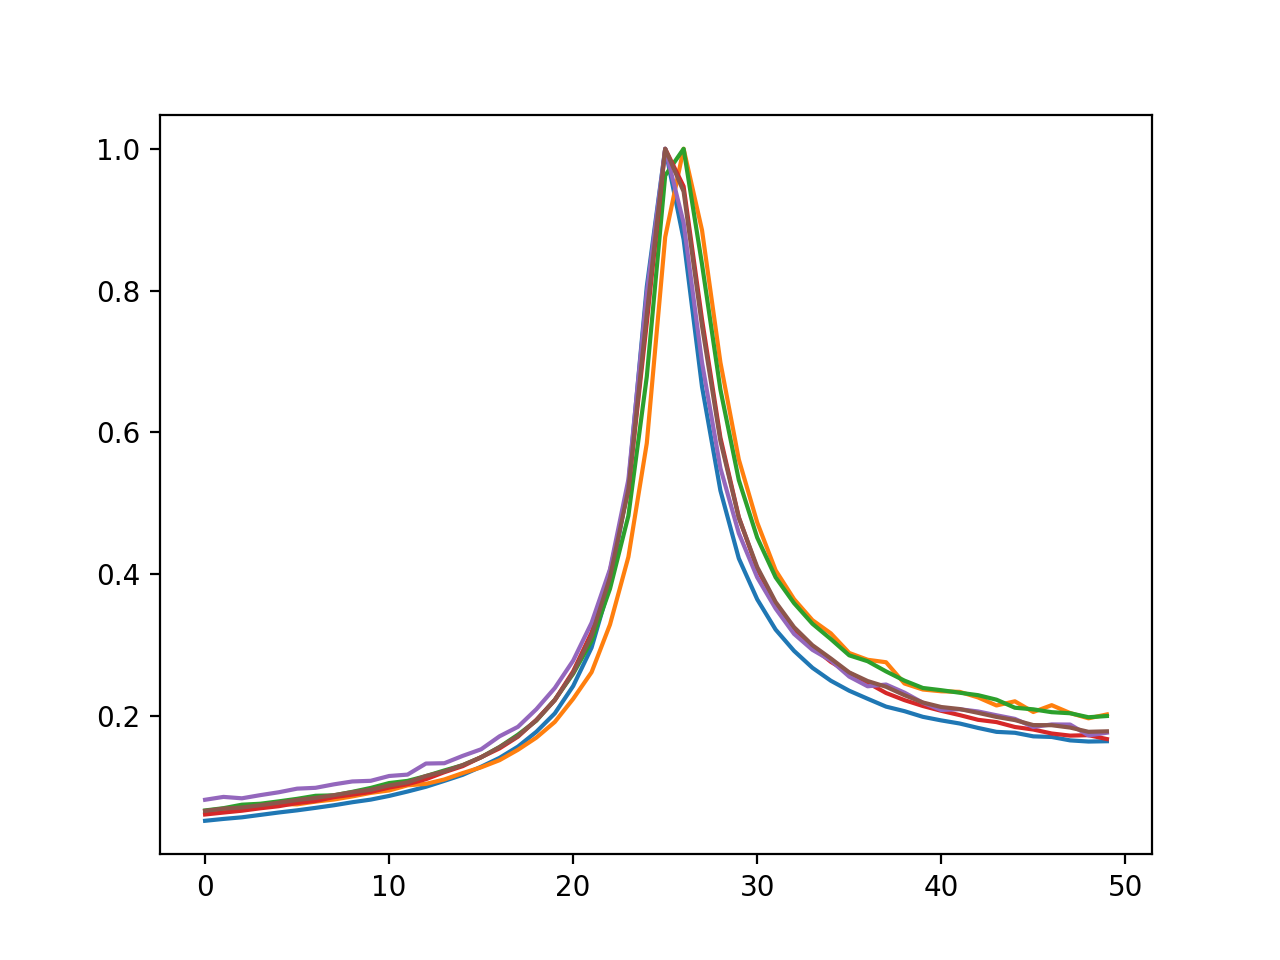

In [16]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [17]:
np.savetxt('membg1.txt', iq1.membg)
np.savetxt('membg2.txt', iq2.membg)
np.savetxt('membg3.txt', iq3.membg)
np.savetxt('membg4.txt', iq4.membg)
np.savetxt('membg5.txt', iq5.membg)
np.savetxt('membg6.txt', iq6.membg)